# Land use and land cover classification from Sentinel-2 imagery using machine learning

In this tutorial, we will perform the classification of Sentinel-2 multispectral images using well-optimized Random Forest (RF) Machine Learning (ML) algorithm. The process involves training a well-optimized RF model and subsequently applying the pre-trained model to map Land Use and Land Cover (LULC) in Sentinel-2 imagery. All the implementation will be carried out using Python programming within the jupyter notebook, and the RF will be implemented using the scikit-learn open-source ML library.

# Dataset Description

The dataset is prepared by using the polygons in the shapefile to extract training samples. For each polygon representing a landcover class, pixel values within that polygon are extracted from the satellite imagery, forming the training data. To label the training data, a landcover class label is assigned to each set of pixel values extracted from a specific polygon. This process results in a labeled dataset where each training sample comprises both input features (pixel values) and a corresponding label (landcover class). After labeling, the dataset is converted into a CSV (Comma-Separated Values) format. This conversion is carried out using libraries like pandas in Python, where each row in the CSV file represents a training sample with pixel values as features and the corresponding landcover class label. The CSV format facilitates seamless integration with various data analysis tools and machine learning libraries, allowing for further exploration, analysis, and utilization in machine learning workflows.


# Training and Testing Dataset

Now, let's import the training and testing datasets from the local machine directory. As mentioned earlier, the data is stored in CSV files. To do this, we'll start by importing the pandas and csv libraries.


In [ ]:
# import necessary libraries for dataset
import csv
import pandas as pd 

cs_training=pd.read_csv('D:\\LULC_Classification_ML\\Ml_data\\training\\4bands_split_MLdata.csv')
cs_testing=pd.read_csv('D:\\LULC_Classification_ML\\Ml_data\\testing\\4bands_split_MLdata.csv')
X_train=cs_training[cs_training.columns[1:5]].values   #R,G,B
y_train=cs_training[cs_training.columns[5]]
X_test=cs_testing[cs_testing.columns[1:5]].values  
y_test=cs_testing[cs_testing.columns[5]] 

In [4]:
# Training and testing dataset shape
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape) 

(300000, 4) (75000, 4) (300000,) (75000,)


In total, the training dataset comprises 300,000 pixel values, with 60,000 pixel values allocated for each landcover class. This results in a balanced dataset. The testing dataset comprises 75,000 pixel values, with 15,000 pixel values assigned for each land cover class. Both datasets represent five different land covers along with their corresponding labels.

In [2]:
# Training and testing data type
print(X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype)

int64 float64 int64 float64


In [4]:
# change labels data type from float to int
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [7]:
# Let's check data type

print( y_train.dtype, y_test.dtype)

int32 int32


# Training the well-optimized RF ML model

Now, let's proceed to train a well-optimized Random Forest (RF) model with fine-tuned hyperparameters. To begin, import the Scikit-Learn machine learning library.

In [8]:
#Train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with n number of decision trees
model =RandomForestClassifier(n_estimators = 100,random_state=400,max_depth=30,max_features='log2',criterion='entropy')
                            
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=30, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=400,
                       verbose=0, warm_start=False)

# Confusion Matrices

First, we'll generate the confusion matrix for the training dataset.

In [9]:
# Test prediction on the training data  
prediction_test_train = model.predict(X_train)

#Test prediction on testing data. 
prediction_test = model.predict(X_test)

Text(26.499999999999993, 0.5, 'True Label')

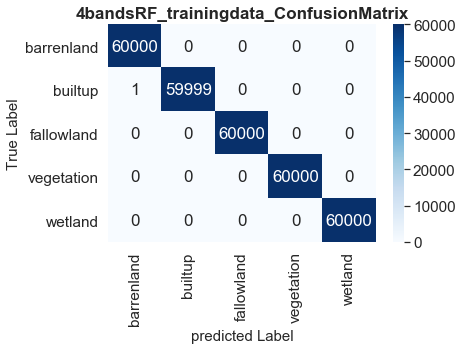

In [13]:
# import necessary libraries for confusion matrix

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Training confusion matrix

confusion_matrix=confusion_matrix(y_train, prediction_test_train)

df_cm = pd.DataFrame(confusion_matrix,index = [ 'barrenland', 'builtup', 'fallowland','vegetation','wetland'],
                                                         columns = [ 'barrenland', 'builtup', 'fallowland','vegetation','wetland'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm,annot=True,fmt="d",cmap='Blues')
plt.title('4bandsRF_trainingdata_ConfusionMatrix',fontweight='bold',fontsize =17) # title with fontsize 20
plt.xlabel('predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15


Now, we'll generate the confusion matrix for the testing dataset.

Text(26.499999999999993, 0.5, 'True Label')

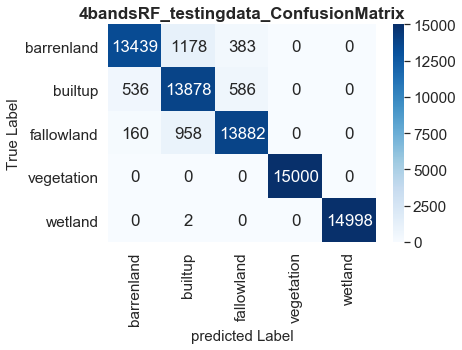

In [14]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

# Testing confusion matrix

confusion_matrix_test=confusion_matrix(y_test, prediction_test)

df_cm_test = pd.DataFrame(confusion_matrix_test,index = [ 'barrenland', 'builtup', 'fallowland','vegetation','wetland'],
                                                         columns = [ 'barrenland', 'builtup', 'fallowland','vegetation','wetland'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm_test,annot=True,fmt="d",cmap='Blues')
plt.title('4bandsRF_testingdata_ConfusionMatrix',fontweight='bold',fontsize =17) # title with fontsize 20
plt.xlabel('predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15) # y-axis label with fontsize 15


# Training and Testing Data Accuracy

In [15]:
from sklearn import metrics
#accuracy on training data
print ("Accuracy on training data = ", metrics.accuracy_score(y_train, prediction_test_train))
#accuracy on test dataset 
print ("Accuracy on testing data = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy on training data =  0.9999966666666666
Accuracy on testing data =  0.9492933333333333


# Save Trained RF model in directory


As we have trained the RF model, we will now save it in our directory. Since we are performing classification in local machine, we will save our trained model in directtory.



In [28]:
# Let's import pickle library

import pickle
filename = 'D:\\LULC_Classification_ML\\LULC_RF_Classificationfinalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Load saved RF model

In [29]:
# Load saved trained DCNN model
loaded_model = pickle.load(open(filename, 'rb'))

# Image Prediction with Trained RF Model

Let's start exploring the Rasterio geospatial library. Initially, we'll load and read the raster data for prediction. Then, we'll use our trained RF model to perform classification.

In [42]:
# import rasterio library
import rasterio

# Replace 'your_image_path.tif' with the path to your image file
image_path = "D:\\LULC_Classification_ML\\Sentinel2image.tif"

# Open the image file using rasterio
with rasterio.open(image_path) as src:
    # Read the image data
    image = src.read()


In [43]:
# Let's check raster shape
print(image.shape)

(4, 2071, 2335)


First, we will reshape our image before performing classification.

In [44]:
# Let's reshape using Rasterio
from rasterio.plot import reshape_as_raster, reshape_as_image
reshaped_img = reshape_as_image(image)
reshape=reshaped_img.reshape(-1,4)

In [45]:
print(reshaped_img.shape)

(2071, 2335, 4)


In [47]:
# Predict new data using trained RF Model
Raster_prediction=loaded_model.predict(reshape)

In [48]:
print(Raster_prediction.shape)

(4835785,)


In [49]:
# Reshape our classification map back into a 2D matrix so we can visualize it
Raster_prediction = Raster_prediction.reshape(reshaped_img[:, :, 0].shape)

# Visualize multispectral and predicted classified raster

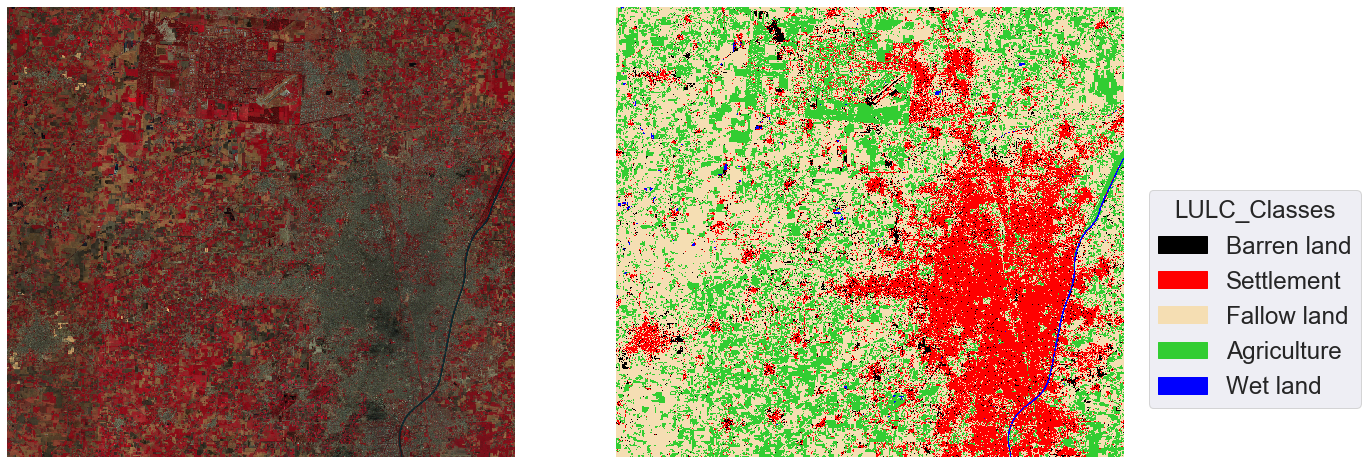

In [70]:
# Let's Visualize
import rasterio
from rasterio.plot import adjust_band
from matplotlib import patches as mpatches
import matplotlib.pyplot as plt

# Function for visualizing the original raster
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = adjust_band(colors[:, :, b])
    return colors

# Create colormap
clist = ["black", "red", "Wheat", "LimeGreen", "Blue"]
cmap = matplotlib.colors.ListedColormap(clist)

# Define class names
class_names = ["Barren land", "Settlement", "Fallow land", "Agriculture", "Wet land"]

# Create legend patches using class names
legend_patches = [mpatches.Patch(color=cmap(i), label=class_names[i]) for i in range(len(clist))]

# Visualize the original raster and the classified image
fig, axs = plt.subplots(1, 2, figsize=(20, 30))

img_stretched = color_stretch(reshaped_img, [3, 2, 1])
axs[0].imshow(img_stretched)
axs[0].set_axis_off()

axs[1].imshow(Raster_prediction, cmap=cmap, interpolation='none')
axs[1].set_axis_off()
legend = axs[1].legend(handles=legend_patches, title='LULC_Classes', bbox_to_anchor=(1.05, 0.35), loc='center left', borderaxespad=0., fontsize='x-large')
legend.get_title().set_fontsize('x-large')

plt.show()
